### Importing Libraries

In [461]:
from lifelines import CoxPHFitter
import pandas as pd
import numpy as np

### Importing dataset

In [462]:
df  = pd.read_csv("Bank_churn.csv")

In [463]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [464]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## PreProcessing

### CustomerId

In [465]:
df_customer = df.copy()

In [466]:
df_customer['CustomerId'].nunique()

10000

All values are unique so droping them.

In [467]:
df_customer.drop(columns=["CustomerId","RowNumber"],axis = 1,inplace = True)

In [468]:
df_customer.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

### Surname

In [469]:
df_surname = df_customer.copy()

In [470]:
df_surname['Surname'].nunique()

2932

In [471]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [472]:
df_surname["Surname"]=le.fit_transform(df_surname["Surname"])

In [473]:
## Correlation checking
# df_corr_surname.corr()
###Considering this time
np.corrcoef(df_surname["Surname"],df_surname["Exited"])[0][1]

-0.010821913464743989

### Geography

In [474]:
df_geography = df_surname.copy()

In [475]:
df_geography["Geography"].nunique() # 3
df_geography["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

#### LabelEncoding

In [476]:
### mapping country
map_country = {'France' : 0,'Germany' : 1,'Spain' : 2}
df_geography["Geography"] = df_geography["Geography"].map(map_country)

In [477]:
df_geography.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1115,619,0,Female,42,2,0.00,1,1,1,101348.88,1
1,1177,608,2,Female,41,1,83807.86,1,0,1,112542.58,0
2,2040,502,0,Female,42,8,159660.80,3,1,0,113931.57,1
3,289,699,0,Female,39,1,0.00,2,0,0,93826.63,0
4,1822,850,2,Female,43,2,125510.82,1,1,1,79084.10,0


In [478]:
np.corrcoef(df_geography["Geography"],df_geography["Exited"])[0][1]

0.035942954606537084

### Gender

In [479]:
df_gender = df_geography.copy()

In [480]:
df_gender["Gender"].nunique()
df_gender["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [481]:
map_gender = {'Male' : 0,'Female' : 1}
df_gender["Gender"] = df_gender["Gender"].map(map_gender)

In [482]:
df_gender.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1115,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,1177,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,2040,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,289,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,1822,850,2,1,43,2,125510.82,1,1,1,79084.10,0


In [483]:
np.corrcoef(df_gender["Gender"],df_gender["Exited"])[0][1]

0.10651248767347483

In [484]:
df_gender.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1115,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,1177,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,2040,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,289,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,1822,850,2,1,43,2,125510.82,1,1,1,79084.10,0


### Checking all correlation

In [485]:
df_final = df_gender.copy()

In [486]:
df_final.corr()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Surname,1.000000,0.007489,-0.022878,0.002049,0.005550,-0.017412,0.002657,-0.016460,-0.008993,0.001483,0.011850,-0.010822
CreditScore,0.007489,1.000000,0.007888,0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,-0.022878,0.007888,1.000000,-0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,0.002049,0.002857,-0.004719,1.000000,0.027544,-0.014733,-0.012087,0.021859,-0.005766,-0.022544,0.008112,0.106512
Age,0.005550,-0.003965,0.022812,0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.017412,0.000842,0.003739,-0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.002657,0.006268,0.069408,-0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,-0.016460,0.012238,0.003972,0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.008993,-0.005458,-0.008523,-0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.001483,0.025651,0.006724,-0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128


### KaplanMeier

In [487]:
from lifelines import KaplanMeierFitter

In [488]:
durations = df_final["Tenure"] # time of event occurence
event_observed = df_final["Exited"] # is censored (0) or not (1)


In [489]:
print(sorted(durations.unique()))
print(sorted(event_observed.unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 1]


In [490]:
print("Durations")
print(durations.value_counts()[[0,1,2,3,4,5,6,7,8,9,10]])
print("Event Observed")
print(event_observed.value_counts())

Durations
0      413
1     1035
2     1048
3     1009
4      989
5     1012
6      967
7     1028
8     1025
9      984
10     490
Name: Tenure, dtype: int64
Event Observed
0    7963
1    2037
Name: Exited, dtype: int64


<AxesSubplot:xlabel='timeline'>

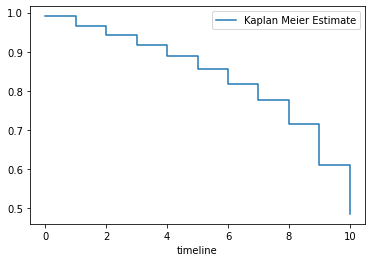

In [491]:
# instance of KaplanMeierFitter
km = KaplanMeierFitter()

#Fit the data
km.fit(durations,event_observed,label="Kaplan Meier Estimate")

#Create an estimate
km.plot(ci_show = False)

## Kaplan Meier for each Cohorts 

In [492]:
df_cohort = df_final.copy()

In [493]:
T = df_cohort["Tenure"] ## time to event
E = df_cohort["Exited"] ## event occured or churned

### CreditScore

Checking on Cohorts of less than and greater than creditscore 

In [494]:
groups = df_cohort["CreditScore"]
credit_score_median = df_cohort["CreditScore"].median()
credit_score_median

652.0

In [495]:
credit_score_less_than_median = (groups < credit_score_median)
credit_score_more_than_median = (groups >= credit_score_median)

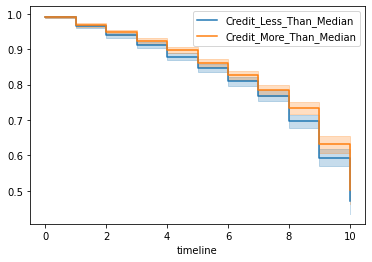

In [496]:
km.fit(T[credit_score_less_than_median],E[credit_score_less_than_median],label = "Credit_Less_Than_Median")
ax = km.plot()

km.fit(T[credit_score_more_than_median],E[credit_score_more_than_median],label = "Credit_More_Than_Median")
ax1 = km.plot(ax=ax)

Here Customer with <b>Credit_More_Than_Median</b> have better Retention.

### Geography

##### Checking with Geography France,Germany,Spain

In [497]:
groups = df_cohort["Geography"]

France  = (groups == 0)
Germany = (groups == 1)
Spain   = (groups == 2)

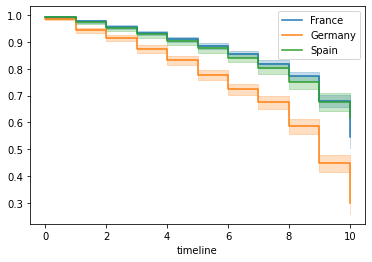

In [498]:

km.fit(T[France],E[France],label = "France")
ax = km.plot()

km.fit(T[Germany],E[Germany],label = "Germany")
ax1 = km.plot(ax=ax)

km.fit(T[Spain],E[Spain],label = "Spain")
ax2 = km.plot(ax=ax1)

Here Customer from <b>France </b>have better customer retention then it is <b>Spain</b>. Finally Customer from <b>Germany</b> have worst customer retention.

### Gender

In [499]:
groups = df_cohort["Gender"]

Male   = (groups == 0)
Female = (groups == 1)


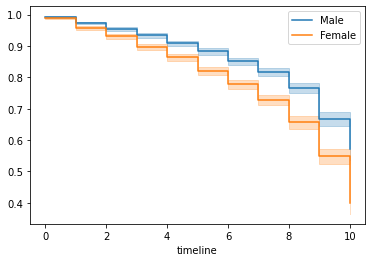

In [500]:
km.fit(T[Male],E[Male],label = "Male")
ax = km.plot()

km.fit(T[Female],E[Female],label = "Female")
ax1 = km.plot(ax=ax)


Here <b>Male</b> have better retention than <b>Female</b>.

### Age

In [501]:
groups = df_cohort["Age"]
age_score_max = df_cohort["Age"].max()
age_score_min = df_cohort["Age"].min()

In [502]:
print(age_score_max)
print(age_score_min)
print("InterQuertile")
print(age_score_max - age_score_min)

92
18
InterQuertile
74


In [503]:
def calculate_age_score(age):
    if 18 <= age < 33:
        return 0
    elif 33 <= age < 48:
        return 1
    elif 48 <= age < 63:
        return 2
    elif 63 <= age < 78:
        return 3
    else:
        return None

In [504]:
df_cohort["Age Score"] = df_cohort["Age"].apply(calculate_age_score)

In [505]:
groups = df_cohort["Age Score"]

In [506]:
age_score_18_33 = (groups == 0)
age_score_33_48 = (groups == 1)
age_score_48_63 = (groups == 2)
age_score_63_78 = (groups == 3)

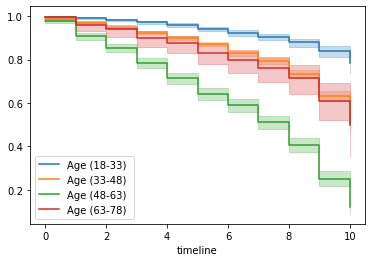

In [507]:
km.fit(T[age_score_18_33],E[age_score_18_33],label = "Age (18-33) ")
ax = km.plot()

km.fit(T[age_score_33_48],E[age_score_33_48],label = "Age (33-48)")
ax1 = km.plot(ax=ax)

km.fit(T[age_score_48_63],E[age_score_48_63],label = "Age (48-63)")
ax2 = km.plot(ax=ax1)

km.fit(T[age_score_63_78],E[age_score_63_78],label = "Age (63-78)")
ax3 = km.plot(ax=ax2)


<b>Age(18-33)</b> seems to have better retention.

### Balance

In [508]:
groups = df_cohort["Balance"]
balance_score_median = df_cohort["Balance"].median()
balance_score_median

97198.54000000001

In [509]:
balance_score_less_than_median = (groups < balance_score_median)
balance_score_more_than_median = (groups >= balance_score_median)

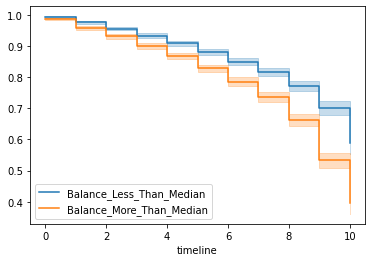

In [510]:
km.fit(T[balance_score_less_than_median],E[balance_score_less_than_median],label = "Balance_Less_Than_Median")
ax = km.plot()

km.fit(T[balance_score_more_than_median],E[balance_score_more_than_median],label = "Balance_More_Than_Median")
ax1 = km.plot(ax=ax)

Users with <b>less Balance than median</b> have better rettention.

In [511]:
balance_score_max = df_cohort["Balance"].max()
balance_score_min = df_cohort["Balance"].min()
print(balance_score_max)
print(balance_score_min)
print(balance_score_max - balance_score_min)

250898.09
0.0
250898.09


#### LabelEncoding on basis of range

In [512]:
def calculate_balance_score(balance):
    if 0 <= balance < 50000:
        return 0
    elif 50000 <= balance < 100000:
        return 1
    elif 100000 <= balance < 150000:
        return 2
    elif 150000 <= balance < 200000:
        return 3
    elif 200000 <= balance < 251000:
        return 4
    else:
        return None

In [513]:
df_cohort["Balance_Score"] = df_cohort["Balance"].apply(calculate_balance_score)

In [514]:
groups = df_cohort["Balance_Score"]

In [515]:
balance_score_0_50K     = (groups == 0 )
balance_score_50K_100K  = (groups == 1 )
balance_score_100K_150K = (groups == 2 )
balance_score_150K_200K = (groups == 3 )
balance_score_200K_251K = (groups == 4 )

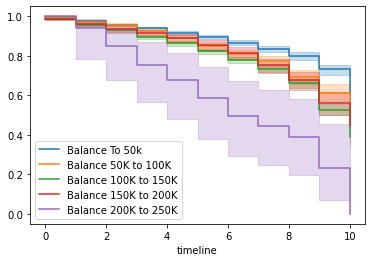

In [516]:
km.fit(T[balance_score_0_50K],E[balance_score_0_50K],label = "Balance To 50k ")
ax = km.plot()

km.fit(T[balance_score_50K_100K],E[balance_score_50K_100K],label = "Balance 50K to 100K")
ax1 = km.plot(ax=ax)

km.fit(T[balance_score_100K_150K],E[balance_score_100K_150K],label = "Balance 100K to 150K")
ax2 = km.plot(ax=ax1)

km.fit(T[balance_score_150K_200K],E[balance_score_150K_200K],label = "Balance 150K to 200K")
ax3 = km.plot(ax=ax2)

km.fit(T[balance_score_200K_251K],E[balance_score_200K_251K],label = "Balance 200K to 250K")
ax4 = km.plot(ax=ax3)

Less Balance has more Retentionm

### IsActiveMember

In [517]:
groups = df_cohort['IsActiveMember']

Active    = (groups == 0)
NonActive = (groups == 1)

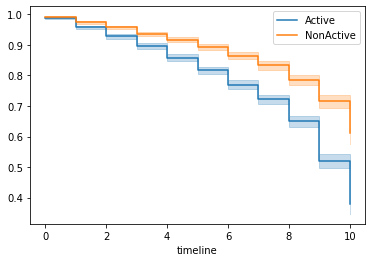

In [518]:

km.fit(T[Active],E[Active],label = "Active")
ax = km.plot()

km.fit(T[NonActive],E[NonActive],label = "NonActive")
ax1 = km.plot(ax=ax)

<b>NonActive</b>Members have better retention than <b>Active</b> Members.

### Estimated Salary

In [519]:
print(df_cohort["EstimatedSalary"].max())
print(df_cohort["EstimatedSalary"].min())
print(df_cohort["EstimatedSalary"].max() - df_cohort["EstimatedSalary"].min())

199992.48
11.58
199980.90000000002


In [520]:
def calculate_salary_score(salary):
    if 0 <= salary < 50000:
        return 0
    elif 50000 <= salary < 100000:
        return 1
    elif 100000 <= salary < 150000:
        return 2
    elif 150000 <= salary < 200000:
        return 3
    else:
        return None

In [521]:
df_cohort["EstimatedSalary_Scores"] = df_cohort["EstimatedSalary"].apply(calculate_salary_score)

In [522]:
groups = df_cohort["EstimatedSalary_Scores"]

In [523]:
salary_score_0_50K     = (groups == 0 )
salary_score_50K_100K  = (groups == 1 )
salary_score_100K_150K = (groups == 2 )
salary_score_150K_200K = (groups == 3 )

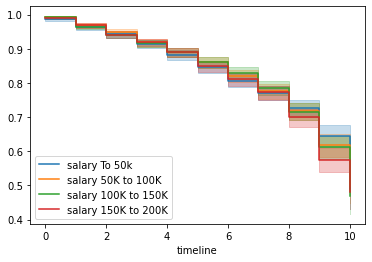

In [524]:
km.fit(T[salary_score_0_50K],E[salary_score_0_50K],label = "salary To 50k ")
ax = km.plot()

km.fit(T[salary_score_50K_100K],E[salary_score_50K_100K],label = "salary 50K to 100K")
ax1 = km.plot(ax=ax)

km.fit(T[salary_score_100K_150K],E[salary_score_100K_150K],label = "salary 100K to 150K")
ax2 = km.plot(ax=ax1)

km.fit(T[salary_score_150K_200K],E[salary_score_150K_200K],label = "salary 150K to 200K")
ax3 = km.plot(ax=ax2)

### Cox Proportional Hazard Model

In [525]:
from lifelines import CoxPHFitter

In [526]:
### Instantiate the class to create a cph object
cph = CoxPHFitter()

cph.fit(df_final,"Tenure",event_col = "Exited")

<lifelines.CoxPHFitter: fitted with 10000 total observations, 7963 right-censored observations>

In [527]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 10000 total observations, 7963 right-censored observations>
             duration col = 'Tenure'
                event col = 'Exited'
      baseline estimation = breslow
   number of observations = 10000
number of events observed = 2037
   partial log-likelihood = -16521.61
         time fit was run = 2023-04-11 09:59:06 UTC

---
                  coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                               
Surname          -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
CreditScore      -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
Geography         0.07       1.07       0.03             0.02             0.12                 1.02                 1.13
Gender            0.41       1.50       0.04             0.32             0.50                 1.38                 1.64
Age               0.05       1.05       0.00             0.04             0.05                 1.05                 1.05
Balance           0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
NumOfProducts    -0.03       0.97       0.04            -0.10             0.05                 0.90                 1.05
HasCrCard        -0.05       0.95       0.05            -0.15             0.04                 0.86                 1.04
IsActiveMember   -0.76       0.47       0.05            -0.86            -0.67                 0.42                 0.51
EstimatedSalary   0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00

                  cmp to      z      p   -log2(p)
covariate                                        
Surname             0.00  -1.11   0.27       1.89
CreditScore         0.00  -2.43   0.02       6.03
Geography           0.00   2.52   0.01       6.41
Gender              0.00   9.12 <0.005      63.51
Age                 0.00  27.30 <0.005     542.74
Balance             0.00   9.27 <0.005      65.58
NumOfProducts       0.00  -0.71   0.48       1.07
HasCrCard           0.00  -1.10   0.27       1.88
IsActiveMember      0.00 -16.07 <0.005     190.69
EstimatedSalary     0.00   0.08   0.93       0.10
---
Concordance = 0.71
Partial AIC = 33063.22
log-likelihood ratio test = 1077.01 on 10 df
-log2(p) of ll-ratio test = 745.18

<AxesSubplot:xlabel='log(HR) (95% CI)'>

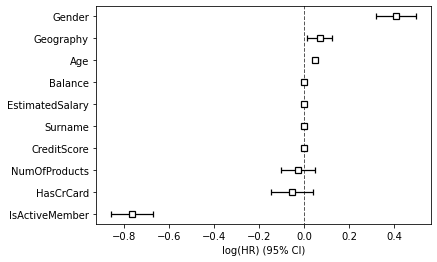

In [528]:
cph.plot()

So insignificant factors are <b>CreditScore</b> , <b>Surname</b> , <b>EstimatedSalary</b> and <b>Balance</b>.

In [529]:
df_rows = df_final.iloc[5:10,0:]
df_rows

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5,537,645,2,0,44,8,113755.78,2,1,0,149756.71,1
6,177,822,0,0,50,7,0.00,2,1,1,10062.80,0
7,2000,376,1,1,29,4,115046.74,4,1,0,119346.88,1
8,1146,501,0,0,44,4,142051.07,2,0,1,74940.50,0
9,1081,684,0,0,27,2,134603.88,1,1,1,71725.73,0


<AxesSubplot:>

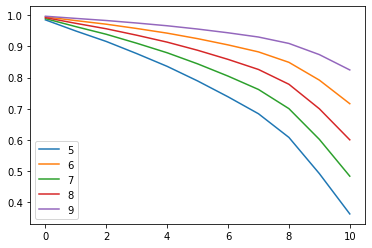

In [530]:
cph.predict_survival_function(df_rows).plot()

We can check corn analyasis for multiple cohorts.